### Stock Market Prediction And Forecasting Using Stacked LSTM

In [103]:
### Keras and Tensorflow >2.0

In [154]:
import pandas as pd
import yfinance as yf 

df = yf.download("TATASTEEL.NS", start = '2024-01-03', end = '2025-01-30')

[*********************100%***********************]  1 of 1 completed


In [155]:
df

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2024-01-03,132.676865,136.842928,131.696614,136.744897,45176618
2024-01-04,131.598587,133.657118,131.353524,133.314025,43913498
2024-01-05,131.010437,133.265016,130.226249,132.333781,71330190
2024-01-08,129.393021,133.265006,129.147958,132.627849,39559717
2024-01-09,131.010437,132.137734,129.883155,130.863405,30736868
...,...,...,...,...,...
2025-01-23,130.369995,130.750000,127.699997,127.849998,20722538
2025-01-24,129.740005,133.199997,129.309998,130.500000,37092106


In [156]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2024-01-03,132.676865,136.842928,131.696614,136.744897,45176618
2024-01-04,131.598587,133.657118,131.353524,133.314025,43913498
2024-01-05,131.010437,133.265016,130.226249,132.333781,71330190
2024-01-08,129.393021,133.265006,129.147958,132.627849,39559717
2024-01-09,131.010437,132.137734,129.883155,130.863405,30736868


In [157]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2025-01-23,130.369995,130.750000,127.699997,127.849998,20722538
2025-01-24,129.740005,133.199997,129.309998,130.500000,37092106
2025-01-27,126.370003,129.449997,125.739998,129.020004,24650571
2025-01-28,128.619995,130.490005,124.739998,126.370003,40373804
2025-01-29,130.800003,131.339996,128.550003,129.000000,16668389


In [158]:
df1=df.reset_index()['Close']

In [159]:
df1

Ticker,TATASTEEL.NS
0,132.676865
1,131.598587
2,131.010437
3,129.393021
4,131.010437
...,...
260,130.369995
261,129.740005
262,126.370003
263,128.619995


In [160]:
df1.shape

(265, 1)

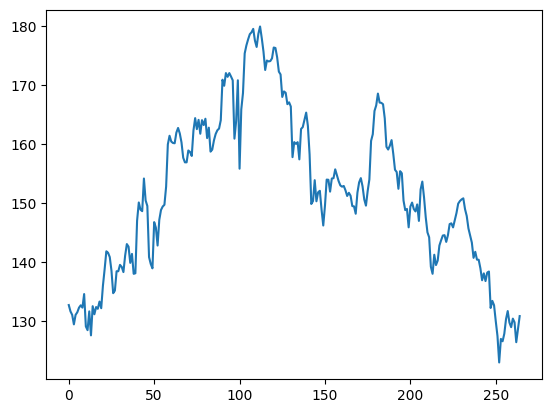

In [161]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [162]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [163]:
import numpy as np

In [164]:
df1

Ticker,TATASTEEL.NS
0,132.676865
1,131.598587
2,131.010437
3,129.393021
4,131.010437
...,...
260,130.369995
261,129.740005
262,126.370003
263,128.619995


In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [166]:
print(df1)

[[0.17096762]
 [0.15205379]
 [0.14173718]
 [0.11336643]
 [0.14173718]
 [0.1494747 ]
 [0.16323009]
 [0.17010792]
 [0.16323009]
 [0.20363684]
 [0.10734829]
 [0.09617225]
 [0.15205379]
 [0.08069734]
 [0.16752857]
 [0.14345657]
 [0.16494948]
 [0.15979131]
 [0.18128423]
 [0.1615107 ]
 [0.22856854]
 [0.27757251]
 [0.33087496]
 [0.32657648]
 [0.31368052]
 [0.27327404]
 [0.20621593]
 [0.21395345]
 [0.27155438]
 [0.27155438]
 [0.29046848]
 [0.28445034]
 [0.26897556]
 [0.31797926]
 [0.35236788]
 [0.34463062]
 [0.29648634]
 [0.32313743]
 [0.26381712]
 [0.26553651]
 [0.42200507]
 [0.47616748]
 [0.45467456]
 [0.45037582]
 [0.54752406]
 [0.48218534]
 [0.46585087]
 [0.31368052]
 [0.29304756]
 [0.2801516 ]
 [0.41770659]
 [0.40137185]
 [0.3480694 ]
 [0.42458442]
 [0.45381486]
 [0.46413121]
 [0.46928965]
 [0.52345206]
 [0.64897051]
 [0.67476218]
 [0.65756773]
 [0.65326899]
 [0.65240956]
 [0.68421909]
 [0.69797448]
 [0.68164001]
 [0.65498865]
 [0.60942373]
 [0.59566807]
 [0.59566807]
 [0.63091664]
 [0.62

In [167]:
df1.shape

(265, 1)

In [168]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [169]:
training_size,test_size

(172, 93)

In [170]:
test_data

array([[0.52429409],
       [0.48535353],
       [0.46676008],
       [0.51026141],
       [0.54481677],
       [0.65953336],
       [0.67935453],
       [0.74864057],
       [0.76512894],
       [0.80021051],
       [0.77354844],
       [0.77267135],
       [0.76863705],
       [0.72671459],
       [0.64181727],
       [0.63374839],
       [0.64532537],
       [0.66181375],
       [0.62076839],
       [0.57358364],
       [0.56674275],
       [0.51692672],
       [0.56937376],
       [0.56305906],
       [0.48166985],
       [0.45342918],
       [0.45693728],
       [0.40221013],
       [0.46395376],
       [0.47588136],
       [0.45676197],
       [0.44957019],
       [0.47044376],
       [0.42132952],
       [0.51499723],
       [0.5383265 ],
       [0.49149264],
       [0.43220498],
       [0.38730036],
       [0.37256617],
       [0.28486226],
       [0.26398868],
       [0.3206456 ],
       [0.28994923],
       [0.30328013],
       [0.34818449],
       [0.36379577],
       [0.377

In [171]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [172]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [173]:
ytest

array([0.65953336, 0.67935453, 0.74864057, 0.76512894, 0.80021051,
       0.77354844, 0.77267135, 0.76863705, 0.72671459, 0.64181727,
       0.63374839, 0.64532537, 0.66181375, 0.62076839, 0.57358364,
       0.56674275, 0.51692672, 0.56937376, 0.56305906, 0.48166985,
       0.45342918, 0.45693728, 0.40221013, 0.46395376, 0.47588136,
       0.45676197, 0.44957019, 0.47044376, 0.42132952, 0.51499723,
       0.5383265 , 0.49149264, 0.43220498, 0.38730036, 0.37256617,
       0.28486226, 0.26398868, 0.3206456 , 0.28994923, 0.30328013,
       0.34818449, 0.36379577, 0.37782845, 0.37888086, 0.35888438,
       0.37905617, 0.41185761, 0.41413773, 0.40203482, 0.42343459,
       0.4448341 , 0.47272415, 0.48044213, 0.48535353, 0.48851074,
       0.45641108, 0.43606371, 0.39905265, 0.37765314, 0.35660399,
       0.31134874, 0.32941599, 0.30608672, 0.30573583, 0.28030175,
       0.24469398, 0.26521667, 0.24223829, 0.26749679, 0.27065427,
       0.1622521 , 0.18330125, 0.17032097, 0.12278534, 0.07893

In [174]:
print(X_train.shape), print(y_train.shape)

(166, 5)
(166,)


(None, None)

In [175]:
print(X_test.shape), print(ytest.shape)

(87, 5)
(87,)


(None, None)

In [176]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [177]:
print(X_test.shape), print(ytest.shape)

(87, 5, 1)
(87,)


(None, None)

In [178]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [179]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/Users/mayank/Documents/Projects Mayank/Stock-prediction-main/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [180]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 5, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.3615 - val_loss: 0.1473
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2791 - val_loss: 0.1045
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2221 - val_loss: 0.0609
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1288 - val_loss: 0.0249
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0568 - val_loss: 0.0249
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0197 - val_loss: 0.0790
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0508 - val_loss: 0.0727
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0373 - val_loss: 0.0365
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - val_loss: 0.0205
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0190 - val_loss: 0.0174
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0255 - val_loss: 0.0170
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0228 - val_l

In [182]:
import tensorflow as tf

In [183]:
tf.__version__

'2.18.0'

In [184]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [185]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [186]:
print(X_test.shape), print(ytest.shape)

(87, 5, 1)
(87,)


(None, None)

In [187]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

155.30049669127112

In [188]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

147.42177773835215

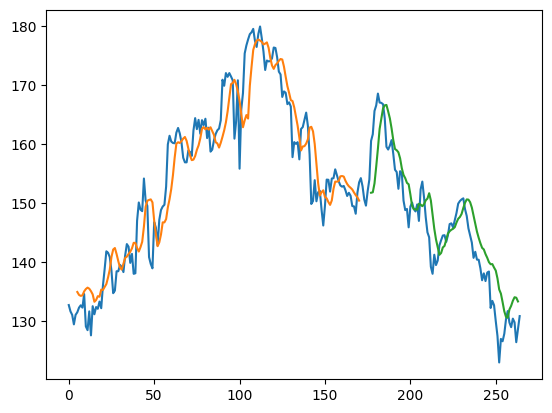

In [189]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [190]:
len(test_data)

93

In [191]:
116-5

111

In [192]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 5)

In [193]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [194]:
temp_input

[0.13050332456106917,
 0.11945281411698927,
 0.06034033174014031,
 0.09980695665323758,
 0.13804599985413013]

In [195]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<10):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17783405]
6
1 day input [0.11945281 0.06034033 0.09980696 0.138046   0.17783405]
1 day output [[0.17382121]]
2 day input [0.06034033 0.09980696 0.138046   0.17783405 0.17382121]
2 day output [[0.17675838]]
3 day input [0.09980696 0.138046   0.17783405 0.17382121 0.17675838]
3 day output [[0.20128663]]
4 day input [0.138046   0.17783405 0.17382121 0.17675838 0.20128663]
4 day output [[0.22062773]]
5 day input [0.17783405 0.17382121 0.17675838 0.20128663 0.22062773]
5 day output [[0.23399776]]
6 day input [0.17382121 0.17675838 0.20128663 0.22062773 0.23399776]
6 day output [[0.24010752]]
7 day input [0.17675838 0.20128663 0.22062773 0.23399776 0.24010752]
7 day output [[0.25116464]]
8 day input [0.20128663 0.22062773 0.23399776 0.24010752 0.25116464]
8 day output [[0.26542282]]
9 day input [0.22062773 0.23399776 0.24010752 0.25116464 0.26542282]
9 day output [[0.27644995]]
[[0.17783404886722565], [0.17382121086120605], [0.17675837874412537], [0.20128662884235382], [0.2206277251243591

In [196]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)
day_new = np.arange(1, 6)
day_pred = np.arange(6, 16)

In [197]:
import matplotlib.pyplot as plt

In [198]:
len(df1)

265

In [199]:
331-5

326

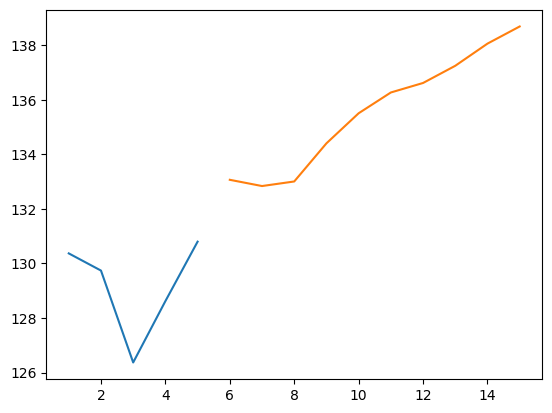

In [200]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

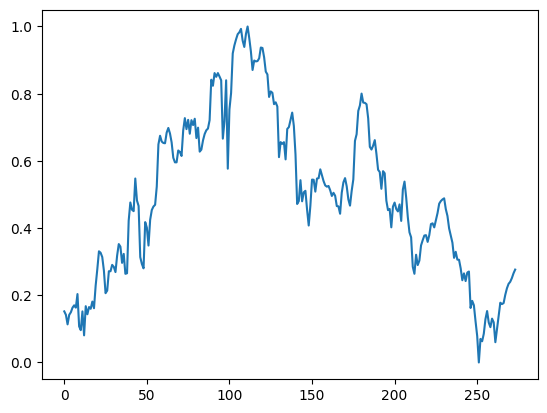

In [201]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [202]:
df3=scaler.inverse_transform(df3).tolist()

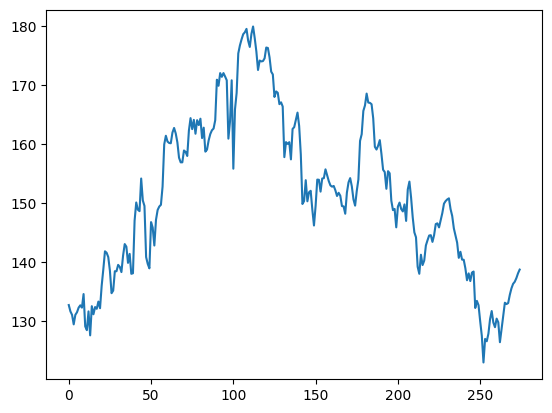

In [203]:
plt.plot(df3)